# 1. Data set

PyTorch 의 TorchVision, TorchText, TorchAudio 등의 라이브러리에서는 다양한 데이터셋 샘플을 제공합니다.

각 라이브러리에 대해 학습 데이터와 테스트 데이터를 사용하는 방법과 더불어 dataset을 커스텀하여 사용하는 방법에 대해 소개하겠습니다.

---

## 1.1 TorchVision

`TorchVision` 는 컴퓨터비전 라이브러리로 datasets, transforms(argument) 등의 다양한 기능을 제공하고 있습니다.

이번 단계에서는 `TorchVision` 에서 제공하는 Datasets 을 활용하는 방법에 대해서 알아보겠습니다. `TorchVision` 에 대한 자세한 설명은 관련 파트(링크) 에서 자세히 다루도록 하겠습니다.

우선 torchvision 을 설치합니다. 환경에 따라 아래 명령어로 설치할 수 있습니다.

1. Anaconda 

   `
   conda install torchvision -c pytorch
   `

2. pip

   `
   !pip install torchvision
   `



이후 torchvision 에서 여러 vision dataset 을 다운받을 수 있습니다. 대표적인 vision dataset 인 CIFAR 를 예시로 살펴보겠습니다.

In [4]:
from torchvision import datasets

# CIFAR 
CIFAR_train = datasets.CIFAR10( 
    root="CIFAR",	# (str), 데이터셋이 저장될 경로, True 인 경우 루트 디렉토리에 생성
    train=True,		# (bool), True 인 경우, train set 에서 데이터 생성
    download=True	# (bool), True 인 경우, root 디렉토리에 데이터 다운로드
)
CIFAR_test = datasets.CIFAR10(
    root="CIFAR",
    train=False,	# (bool), Flase 인 경우, test set 에서 데이터 생성
    download=True
)

Files already downloaded and verified
Files already downloaded and verified


`datasets` 에서 사용하는 매개변수는 아래와 같습니다.

1. root
2. train
3. download
4. transform
5. target_transform

*추가 예정*

이때, `torchvision.transforms` 클래스를 사용하면 데이터 타입을 tesor 로 변환하거나 이미지에 변형을 줄 수 있습니다. 관련하여 자세한 내용은 Data Argument 파트(링크)에서 자세히 다루며, 여기에서는 가볍게 살펴보도록 하겠습니다.

In [6]:
from torchvision import datasets
from torchvision.transforms import ToTensor, RandomCrop, RandomVerticalFlip

# ToTensor, 데이터 타입을 tensor 로 변경
cifar_test_ToTensor = datasets.CIFAR10(
    root="CIFAR_ToTensor",
    train=False,
    download=True,
    transform=ToTensor(),	# data 타입을 Tesor 로 변경
)

# RandomCrop, 데이터를 랜덤으로 crop 하여 size 크기로 출력
cifar_test_RandomCrop = datasets.CIFAR10(
    root="CIFAR_RandomCrop",
    train=False,
    download=True,
    transform=RandomCrop(25),	# data 를 랜덤으로 crop 하여 25*25 사이즈로 출력
)

# RandomVerticalFlip, 이미지 뒤집기
cifar_test_RandomVerticalFlip = datasets.CIFAR10(
    root="CIFAR_RandomVerticalFlip",
    train=False,
    download=True,
    transform=RandomVerticalFlip(p=0.5),	# data 를 수직으로 뒤집기
)


Extracting CIFAR_ToTensor\cifar-10-python.tar.gz to CIFAR_ToTensor



Extracting CIFAR_RandomCrop\cifar-10-python.tar.gz to CIFAR_RandomCrop



Extracting CIFAR_RandomVerticalFlip\cifar-10-python.tar.gz to CIFAR_RandomVerticalFlip


transforms 중 RandomCrop 의 결과를 살펴보겠습니다. 원래 Cifar 데이터의 크기는 32 * 32 이지만, RandomCrop(25) 으로 25 * 25 크기로 잘려 변형되었습니다.

matplotlib 라이브러리로 시각화하여 결과를 살펴보겠습니다.

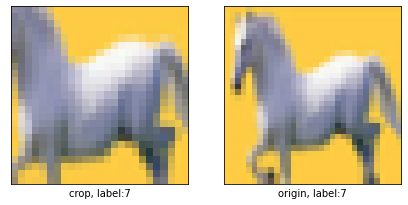

In [27]:
import torch
import matplotlib.pyplot as plt


# 노란 배경의 흰 말 사진(idx :808) 데이터로 확인
crop_image, l1 = cifar_test_RandomCrop[808] #transform 거친 데이터
image, l2 = test[808] # 원본 데이터

fig = plt.figure(figsize=(7, 7)) # 출력할 이미지 사이즈 조정

ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(crop_image)
ax1.set_xlabel("crop, label:"+ str(l1))
ax1.set_xticks([]), ax1.set_yticks([])
 
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(image)
ax2.set_xlabel("origin, label:"+ str(l2))
ax2.set_xticks([]), ax2.set_yticks([])
 
plt.show()

위 출력 결과에서 crop 된 이미지가 사이즈에 맞춰 변형된 것을 확인할 수 있습니다. 참고로 cifar 10 데이터 셋에서 말 사진은 label 7로 분류됩니다. 또한, dataset으로 불러온 데이터들이 feature(데이터셋의 특징, cifar 데이터에서는 이미지 픽셀값)과 label 로 구성되어 있다는 것을 알 수 있습니다.



불러온 데이터 셋을 `DataLoader` 클래스로 묶어서 객체로 활용할 수 있습니다. 관련 내용은 이하 `DataLoader` 클래스 파트(링크)에서 자세히 다루도록 하겠습니다.

CIFAR 와 MNIST 외의 다양한 vision 데이터가 있습니다. 관련하여 공식문서 ([링크](https://pytorch.org/vision/stable/datasets.html)) 를 참조바랍니다.

---



## 1.2 TorchText

`TorchText` 는 자연어처리 라이브러리로 Tokenization 을 비롯한 다양한 기능을 제공하고 있습니다. 이번 단계에서는 `TorchText` 에서 제공하는 Datasets 을 활용하는 방법에 대해서 알아보겠습니다. `TorchText` 에 대한 자세한 설명은 관련 파트(링크) 에서 자세히 다루도록 하겠습니다.

*(추가예정)*



---





## 1.3 TorchAudio

`TorchAudio` 는 오디오 라이브러리로 ??? 을 비롯한 다양한 기능을 제공하고 있습니다. 이번 단계에서는 `TorchAudio` 에서 제공하는 Datasets 을 활용하는 방법에 대해서 알아보겠습니다. `TorchAudio` 에 대한 자세한 설명은 관련 파트(링크) 에서 자세히 다루도록 하겠습니다.

*(추가예정)*



---



### 1.4 Custom Dataset

사용자가 직접 Dataset을 정의하여 사용할 수도 있습니다.

*(추가예정)*

- https://tutorials.pytorch.kr/beginner/basics/tensorqs_tutorial.html

- https://sanghyu.tistory.com/90
- https://pytorch.org/docs/stable/data.html#dataloader-collate-fn
- https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html#id9



---
